<a href="https://colab.research.google.com/github/itsnaveenkroy/CreditCard_FraudDetection/blob/main/CreditCardFraudDetection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0    284315
1       492
Name: Class, dtype: int64
This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

***Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!***

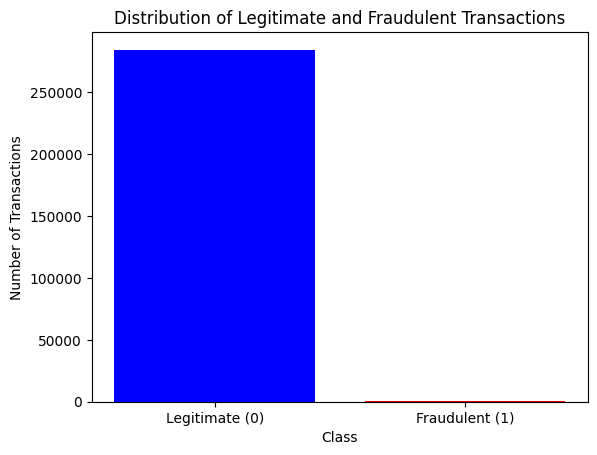

In [4]:
import matplotlib.pyplot as plt

# Count the number of transactions for each class
class_counts = credit_card_data['Class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.xticks(class_counts.index, ['Legitimate (0)', 'Fraudulent (1)'])

# Show the plot
plt.show()


In [12]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [17]:
legit_sample = legit.sample(n=492)

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269654,163708.0,1.717257,-1.730569,-0.453564,-0.930716,-1.129768,0.503513,-1.143495,0.116835,-0.075609,...,0.390413,0.707287,0.037357,0.338728,-0.433413,-0.310327,-0.002284,-0.002051,225.04,0
53148,45835.0,1.245662,-0.308728,0.261981,-1.878178,-0.828173,-1.337678,0.015053,-0.262201,1.761083,...,-0.110234,0.044685,0.030723,0.654887,0.597572,-0.902253,0.090992,0.026016,4.71,0
10883,18653.0,-1.305978,1.772118,0.741730,0.912351,0.498898,1.737490,-0.957795,-1.692301,0.755233,...,1.985454,-1.290109,0.108807,-1.427937,0.140905,-0.393444,0.078297,-0.052505,1.00,0
282841,171190.0,1.884300,-2.036020,-0.987460,-1.490773,-1.460388,-0.305543,-1.014028,-0.118446,-1.386881,...,-0.003478,0.070693,0.036431,-0.399682,-0.317717,-0.193146,-0.014699,-0.026547,207.65,0
139726,83313.0,-6.831267,-7.475145,2.101209,2.819262,2.474442,-0.981694,-2.948267,1.616816,0.677312,...,0.945407,-0.004789,0.526706,-0.212644,0.403048,1.028449,0.138443,-0.959954,401.35,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

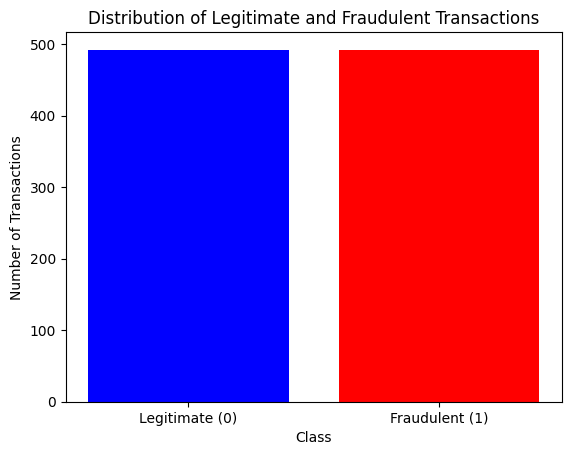

In [22]:
# Count the number of transactions for each class
class_counts = new_dataset['Class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.xticks(class_counts.index, ['Legitimate (0)', 'Fraudulent (1)'])

# Show the plot
plt.show()


In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93500.776423,0.101757,-0.153304,0.016576,-0.071906,-0.026942,0.057101,0.013962,-0.050672,0.036614,...,0.022054,0.009236,0.016823,-0.026588,-0.023043,-0.009477,0.033686,0.005371,0.017364,109.382154
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
269654  163708.0  1.717257 -1.730569 -0.453564 -0.930716 -1.129768  0.503513   
53148    45835.0  1.245662 -0.308728  0.261981 -1.878178 -0.828173 -1.337678   
10883    18653.0 -1.305978  1.772118  0.741730  0.912351  0.498898  1.737490   
282841  171190.0  1.884300 -2.036020 -0.987460 -1.490773 -1.460388 -0.305543   
139726   83313.0 -6.831267 -7.475145  2.101209  2.819262  2.474442 -0.981694   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y)

269654    0
53148     0
10883     0
282841    0
139726    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [29]:
model = LogisticRegression()

In [30]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9313850063532402


In [33]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


Now implementing Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier


In [36]:
# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

In [37]:
# Train the Decision Tree model with Training Data
decision_tree_model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [38]:
# Make predictions on the training data
train_predictions = decision_tree_model.predict(X_train)

In [43]:
# Calculate training accuracy
training_accuracy = accuracy_score(train_predictions, Y_train)
print('Training Accuracy:', training_accuracy)

Training Accuracy: 1.0


In [44]:
# Make predictions on the test data
test_predictions = decision_tree_model.predict(X_test)

In [42]:
# Calculate test accuracy
test_accuracy = accuracy_score(test_predictions, Y_test)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.8984771573604061


Implementing Support Vector Machine (SVM) model and evaluate its performance:



In [51]:
from sklearn.svm import SVC

In [52]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

In [53]:
# Train the SVM model with Training Data
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [54]:
# Make predictions on the training data
train_predictions_svm = svm_model.predict(X_train)


In [56]:
# Calculate training accuracy
training_accuracy_svm = accuracy_score(train_predictions_svm, Y_train)
print('Training Accuracy (SVM):', training_accuracy_svm)

Training Accuracy (SVM): 0.8996188055908514


In [57]:
# Make predictions on the test data
test_predictions_svm = svm_model.predict(X_test)

In [58]:
# Calculate test accuracy
test_accuracy_svm = accuracy_score(test_predictions_svm, Y_test)
print('Test Accuracy (SVM):', test_accuracy_svm)

Test Accuracy (SVM): 0.9086294416243654


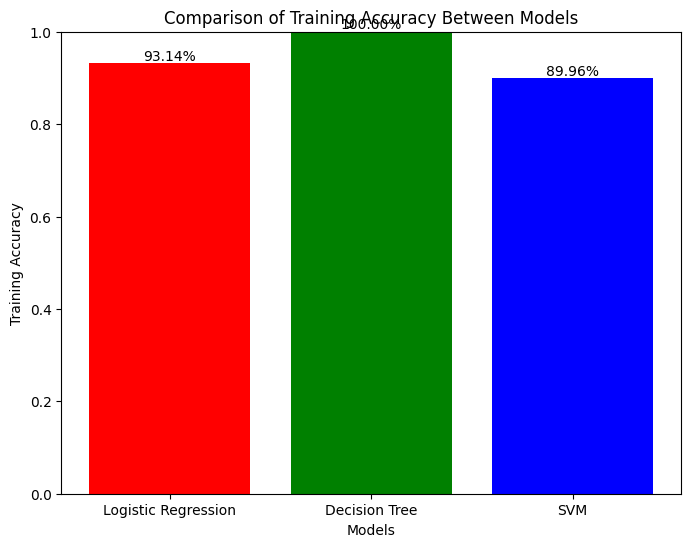

In [66]:
# Define models and their training accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM']
training_accuracies = [training_data_accuracy, training_accuracy, training_accuracy_svm]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(models, training_accuracies, color=['red', 'green', 'blue'])
plt.xlabel('Models')
plt.ylabel('Training Accuracy')
plt.title('Comparison of Training Accuracy Between Models')
plt.ylim(0.0, 1.0)  # Set y-axis limits from 0 to 1 for accuracy

# Add percentage values on top of each bar
for i, accuracy in enumerate(training_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2%}', ha='center', va='bottom')

plt.show()


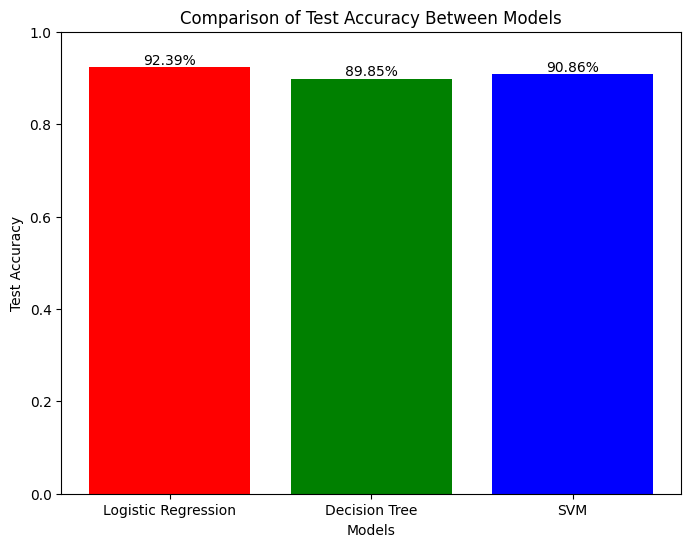

In [68]:
# Define models and their test accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM']
test_accuracies = [test_data_accuracy, test_accuracy, test_accuracy_svm]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(models, test_accuracies, color=['red', 'green', 'blue'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Between Models')
plt.ylim(0.0, 1.0)  # Set y-axis limits from 0 to 1 for accuracy

# Add percentage values on top of each bar
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2%}', ha='center', va='bottom')

plt.show()
